## **In this project the method of Logistic Regression has been used to predict the survival status of the passengers in this Titanic dataset.**

Importing required packages

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, confusion_matrix

Reading the data

In [110]:
df=pd.read_csv('/content/drive/MyDrive/CODSOFT/tested.csv')

In [ ]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


**The data description is as follows:**

**PassengerId** passenger ID\
**Survived** Survival (0 = No; 1 = Yes)\
**Pclass** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\
**Name** Name of the passengers\
**Sex** Gender of the passengers\
**Age** Age of the passengers\
**SibSp** Number of Siblings/Spouses Aboard\
**Parch** Number of Parents/Children Aboard\
**Ticket** Ticket Number of the passengers\
**Fare** Passenger Fare\
**Cabin** Cabin number of the passengers\
**Embarked** Port where passengers embarked on the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton)

### **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


We have 418 rows and 12 columns in the data.
Among these, there are 5 integer type data, 2 float type data and 5 object type data.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


We need to check which of the columns have more than 50% of missing values and omit them from the dataset.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Since there is almost 78.23% data missing from the column Cabin, we will omit that column.

In [ ]:
df=df.drop(['Cabin'],axis=1)

In [ ]:
np.where(df['Fare'].isnull()==True)

(array([152]),)

We substitute the missing values in the Age and Fare column. For Age column, we will substitute with the mean age and the Fare column with forward fill method since it has only one missing value.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(method ='ffill')

In [ ]:
df.isnull().sum()

Now we convert the gender column from string to binary datatype.
We consider 0 to be male and 1 as female.

In [ ]:
df['Sex'].astype('category')
df['Sex'].replace({'male':0,'female':1},inplace=True)

We also convert the Embarked column to dummy variable to include it in our model.

In [ ]:
embark=pd.get_dummies(df['Embarked'])
df=pd.concat([df,embark],axis=1)
df=df.drop(['Embarked'],axis=1)

We also drop the Name, PassengerID and Ticket columns since they are irrelevant to our model.

In [ ]:
df=df.drop(['Name','PassengerId','Ticket'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,34.5,0,0,7.8292,0,1,0
1,1,3,1,47.0,1,0,7.0000,0,0,1
2,0,2,0,62.0,0,0,9.6875,0,1,0
3,0,3,0,27.0,0,0,8.6625,0,0,1
4,1,3,1,22.0,1,1,12.2875,0,0,1


We will now plot a heatmap to check the correlation of the feature variables with our target variable.

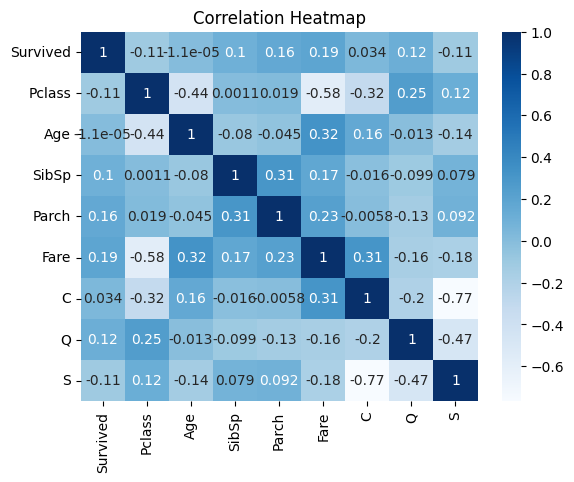

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

We can clearly notice that the Sex attribute has a completly strong positive correlation of 1 (highest correlation) with the target column so we have to drop it to avoid overfitting in our model.

In [ ]:
df=df.drop(['Sex'],axis=1)

### **Quick EDA**

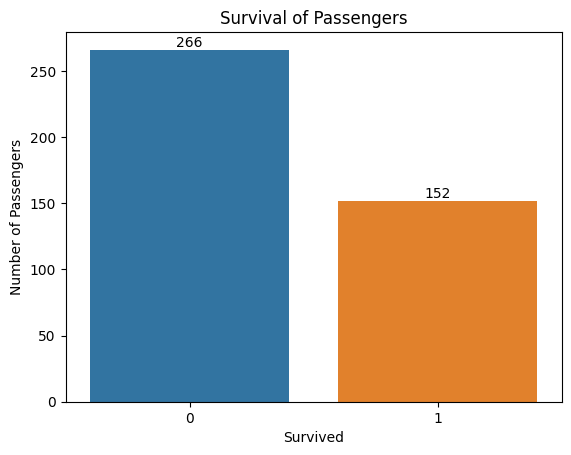

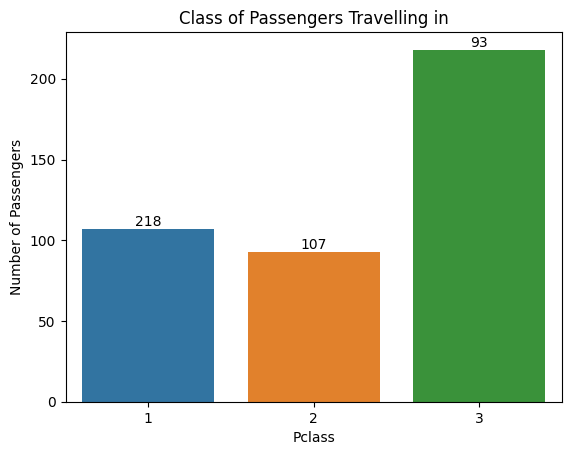

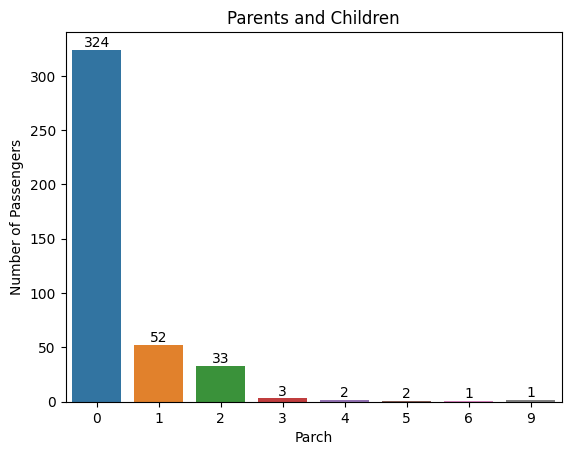

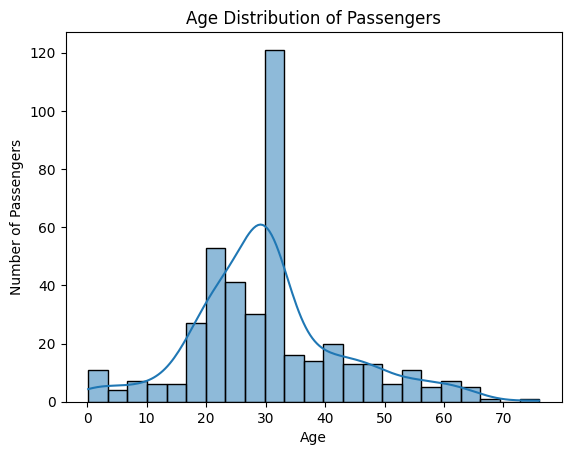

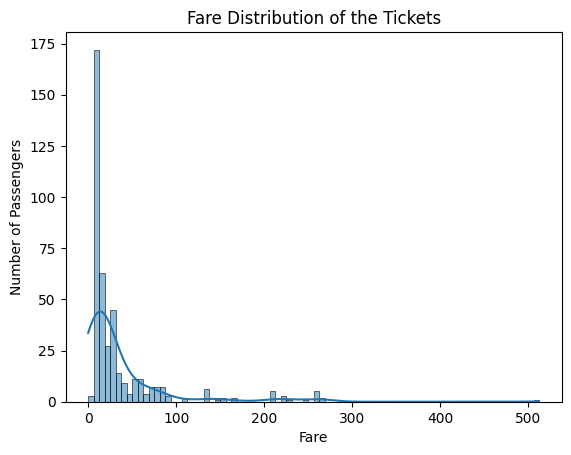

In [ ]:
s=sns.countplot(x='Survived',data=df)
abs_values = df['Survived'].value_counts(ascending=False).values
s.bar_label(container=s.containers[0], labels=abs_values)
plt.title('Survival of Passengers')
plt.ylabel('Number of Passengers')
plt.show()

s=sns.countplot(x='Pclass',data=df)
abs_values = df['Pclass'].value_counts(ascending=False).values
s.bar_label(container=s.containers[0], labels=abs_values)
plt.title('Class of Passengers Travelling in')
plt.ylabel('Number of Passengers')
plt.show()

s=sns.countplot(x='Parch',data=df)
abs_values = df['Parch'].value_counts(ascending=False).values
s.bar_label(container=s.containers[0], labels=abs_values)
plt.title('Parents and Children')
plt.ylabel('Number of Passengers')
plt.show()

sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution of Passengers')
plt.ylabel('Number of Passengers')
plt.show()

sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution of the Tickets')
plt.ylabel('Number of Passengers')
plt.show()

The visualizations of the various graphs help us to gain a rapid understanding of the feature variables to be incorporated in our model.

**We are now ready to proceed with our model fitting.**

### **To predict the survival, we will at first divide the dataset into two parts: the training dataset and the test dataset. After this division, we will fit a Logistic Regression Model on the training dataset and check how the model performs on the test dataset.**

We first identify our objective, which is to predict the survivality of passengers. Hence, we select our target/response variable as the column Survived.

In [ ]:
target = df['Survived']

We then divide the data into the training set and the test set. We state our test size as 0.25, which implies that 75% of the data is being used to model the logistic regression and 25% will be used to check the performance of the model.

In [ ]:
x=df.drop(['Survived'],axis=1)
np.random.seed(12345)
x_train, x_test, y_train, y_test = train_test_split(x,target, test_size = 0.25, random_state=32)

Now we fit the model.

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)

To check the accuracy of the model, we evaluate the training and test mean squared error (MSE), the accuracy score, the precision score, the recall score and the area under curve score of the receiver operating characteristic curve. We will also plot the confusion matrix.

*   Accuracy tells us how often we can expect our machine learning model will
correctly predict an outcome out of the total number of times it made predictions. \
*   The model precision score measures the proportion of positively predicted labels that are actually correct.  \
*   Model recall score represents the model’s ability to correctly predict the positives out of actual positives. \




In [ ]:
y_t_hat=model.predict(x_train)
print("The training mean squared error(MSE) is: ",mean_squared_error(y_train,y_t_hat))
print("The test mean squared error(MSE) is: ",mean_squared_error(y_test,y_hat))
print("The accuracy score of the model is: ",accuracy_score(y_test, y_hat))
print("The precision score of the model is: ",precision_score(y_test, y_hat))
print("The recall score of the model is: ",recall_score(y_test, y_hat))

The training mean squared error(MSE) is:  0.3546325878594249
The test mean squared error(MSE) is:  0.29523809523809524
The accuracy score of the model is:  0.7047619047619048
The precision score of the model is:  0.6666666666666666
The recall score of the model is:  0.22857142857142856




*   The test MSE is less than the training MSE which shows that there is no overfitting in the model. \
*   A pretty decent high accuracy, average precision score also show that the model is almost a good fit on the data.\
*   Low recall score,however, is concerning for the model.



Let us also plot the confusion matrix.

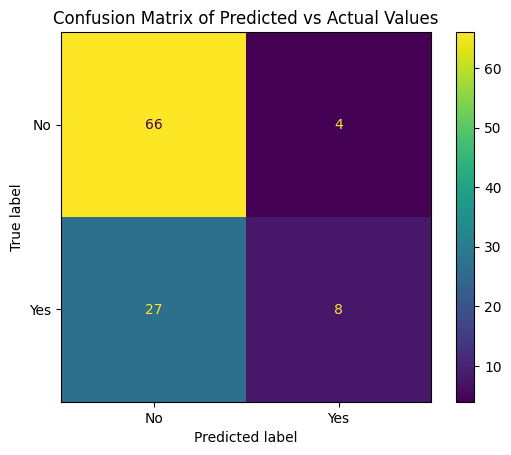

In [ ]:
cm=confusion_matrix(y_test,y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title('Confusion Matrix of Predicted vs Actual Values')
plt.show()

The confusion matrix is an easy way of visualizing the true and false predictions.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)
print("The area under the roc curve is: ",roc_auc)

The area under the roc curve is:  0.5857142857142857


We will also plot the receiver operating characteristic curve.

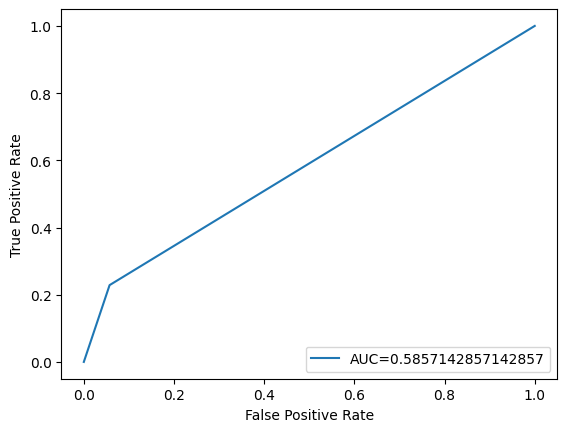

In [ ]:
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications. Since **our model has an AUC score of 0.58571**, this model does a pretty decent job at predicting the target variable on the test dataset.